In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/MSIM/datasets/balloons.csv')
df

,Color,size,act,age,inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,SMALL,DIP,CHILD,F
...,...,...,...,...,...
71,PURPLE,SMALL,DIP,CHILD,F
72,PURPLE,LARGE,STRETCH,ADULT,T
73,PURPLE,LARGE,STRETCH,CHILD,F
74,PURPLE,LARGE,DIP,ADULT,F


In [4]:
# Convert categorical data into int representations of unique categories
for col in df.columns:
  labels, uniques = pd.factorize(df[col])
  df[col] = labels

In [5]:
df

,Color,size,act,age,inflated
0,0,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
71,1,0,1,1,1
72,1,1,0,0,0
73,1,1,0,1,1
74,1,1,1,0,1


In [6]:
X = df.drop(columns='inflated')
y = df['inflated']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [7]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.6956521739130435
[[7 5]
 [2 9]]


In [8]:
import graphviz
dot_data = tree.export_graphviz(dtree,out_file=None,feature_names=('Color','size','act','age'),
                                class_names=('0','1'),
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph.render('balloons_dt',view=True)

'balloons_dt.png'

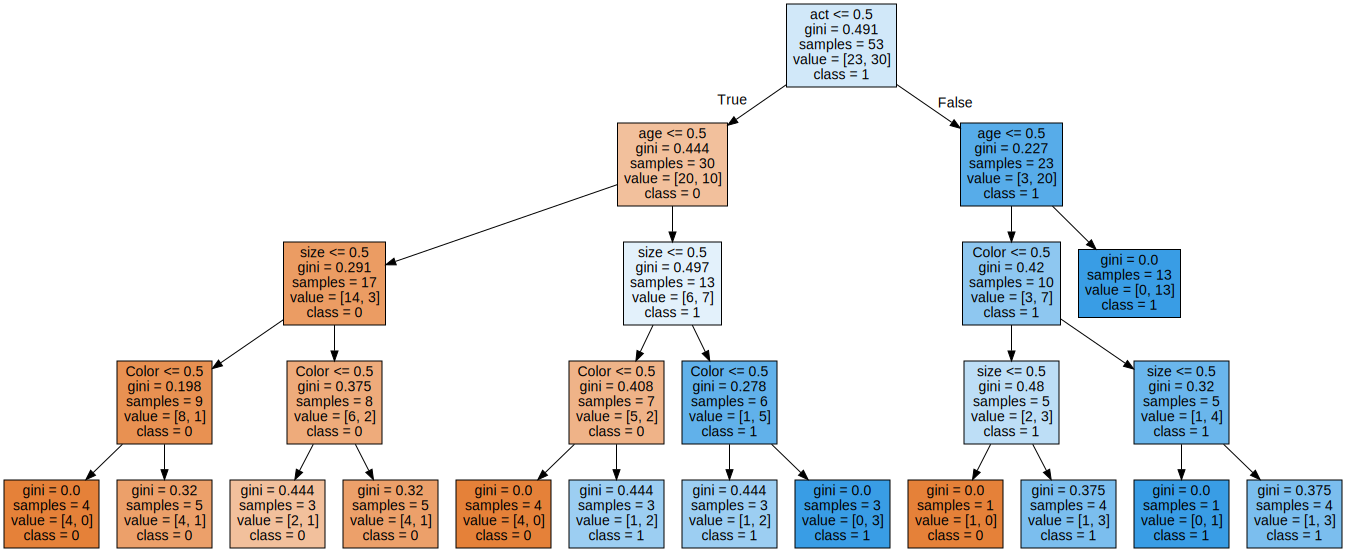

In [9]:
with open("balloons_dt") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)